In [10]:
#IMPORTING LIBRARIES AND DEPENDENCIES:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from fast_ml.model_development import train_valid_test_split
import math
from math import sqrt


In [11]:
#@ READING DATASET:
PATH = "./housing.csv"
cols = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", 
               "median_income", "median_house_value", "ocean_proximity"]
df = pd.read_csv(PATH)
df = df[cols]
df.total_bedrooms = df.total_bedrooms.fillna(0)
df.median_house_value=np.log1p(df.median_house_value)
df=pd.get_dummies(df)
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df, target='median_house_value',train_size=0.6,valid_size=0.2,test_size=0.2, random_state=1)

In [12]:

rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_valid)
np.sqrt(mean_squared_error(y_valid, y_pred))

print(f'rmse:{round(sqrt(mean_squared_error(y_valid, y_pred)),5)}')




rmse:0.2495


In [13]:
scores = []

for n in tqdm(range(10, 201, 10)):
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_valid)
    score = np.sqrt(mean_squared_error(y_valid, y_pred))
    
    scores.append((n, score))

df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])

100%|██████████| 20/20 [01:04<00:00,  3.23s/it]


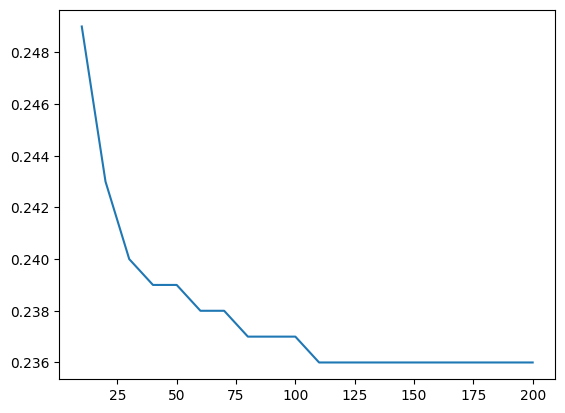

In [14]:
plt.plot(df_scores.n_estimators, df_scores.rmse.round(3))

In [17]:
scores = []

for n in tqdm(range(105, 109, 1)):
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_valid)
    score = np.sqrt(mean_squared_error(y_valid, y_pred))
    
    scores.append((n, score))

df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])

100%|██████████| 4/4 [00:12<00:00,  3.01s/it]


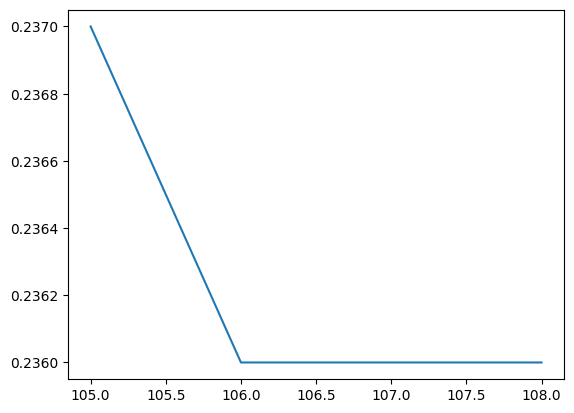

In [18]:
plt.plot(df_scores.n_estimators, df_scores.rmse.round(3))

In [20]:
# Best Model 

model = RandomForestRegressor(n_estimators=106, random_state=1, n_jobs=-1)
model.fit(X_train, y_train)
    
y_pred = rf.predict(X_valid)
score = np.sqrt(mean_squared_error(y_valid, y_pred))

print(score)

0.23641783768437993


In [21]:
model.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(n_estimators=106, n_jobs=-1, random_state=1)>